In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv(r"C:\Users\MaxiSoko\Desktop\amazon.csv")

<h2 style="color:blue"> 1) Cleaning the data </h2>


In [75]:
# remove currency from price
df["discounted_price"] = df["discounted_price"].str.removeprefix("₹").replace(",","")
df["discounted_price"] = df["discounted_price"].str.replace(",","")
df["actual_price"] = df["actual_price"].str.removeprefix("₹").replace(",","")
df["actual_price"] = df["actual_price"].str.replace(",","")

# make discount, rating, rating_count a numerical value
df["discount_percentage"] = df["discount_percentage"].str.removesuffix("%")
df["rating_count"] = df["rating_count"].str.replace(",","")
df["rating"] = df["rating"].replace("|", np.nan)

# make product_id the index
# df.set_index("product_id", inplace=True)

In [ ]:
# define Dtypes

df = df.astype({"discounted_price"      : float,
                "actual_price"          : float,
                "rating"                : float,
                "discount_percentage"   : float,
                "rating_count"          : 'Int64',
                })

In [ ]:
# rename some columns

df.rename(columns={"discounted_price" :"discounted_price (₹)",
                   "actual_price" :"actual_price (₹)" })

<h2 style="color:blue"> 2) First overview on raw data </h2>


In [94]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   str    
 1   product_name         1465 non-null   str    
 2   category             1465 non-null   str    
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   str    
 9   user_id              1465 non-null   str    
 10  user_name            1465 non-null   str    
 11  review_id            1465 non-null   str    
 12  review_title         1465 non-null   str    
 13  review_content       1465 non-null   str    
 14  img_link             1465 non-null   str    
 15  product_link         1465 non-null   str    
dtyp

In [95]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.0
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.0
25%,325.000000,800.000000,32.000000,4.000000,1186.0
50%,799.000000,1650.000000,50.000000,4.100000,5179.0
75%,1999.000000,4295.000000,63.000000,4.300000,17336.5
max,77990.000000,139900.000000,94.000000,5.000000,426973.0


In [ ]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [100]:
df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   25
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [132]:
df.sort_values(by="actual_price", ascending=False).head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,44.0,4.7,5935,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...
255,B0BC8BQ432,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",54990.0,85000.0,35.0,4.3,3587,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AHY6AK5LXBTGXDDXSU57ISMDW55Q,AGULFHMPCHCL32WCI...","UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud","R2G4T57OLXDVPL,R3IQ8PWVTWENBY,RH6UHEBP622FT,R3...",Good TV for the price. (But my experience was ...,",Screen quality is good.It's been a month I bo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/VU-inches-GloLED-Google-...


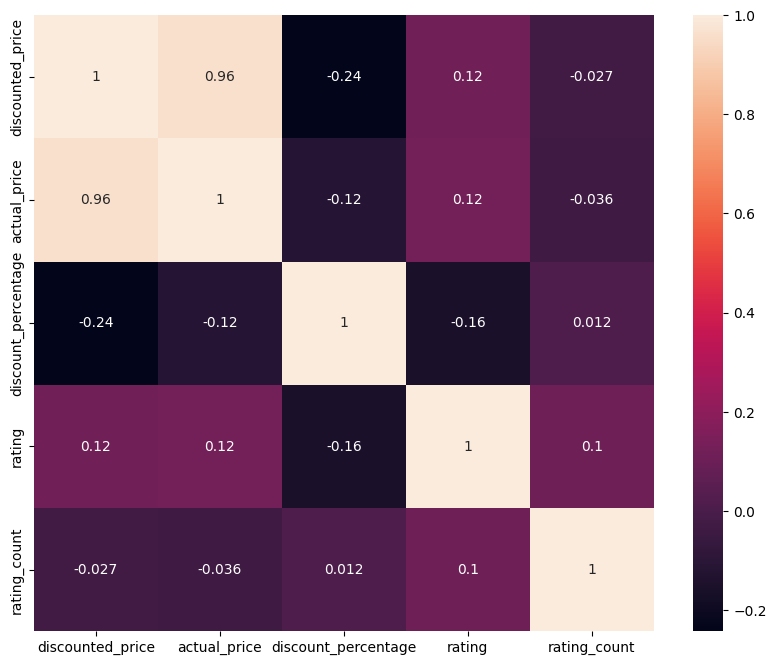

In [165]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True)

plt.rcParams['figure.figsize'] = (10,7)
plt.show()

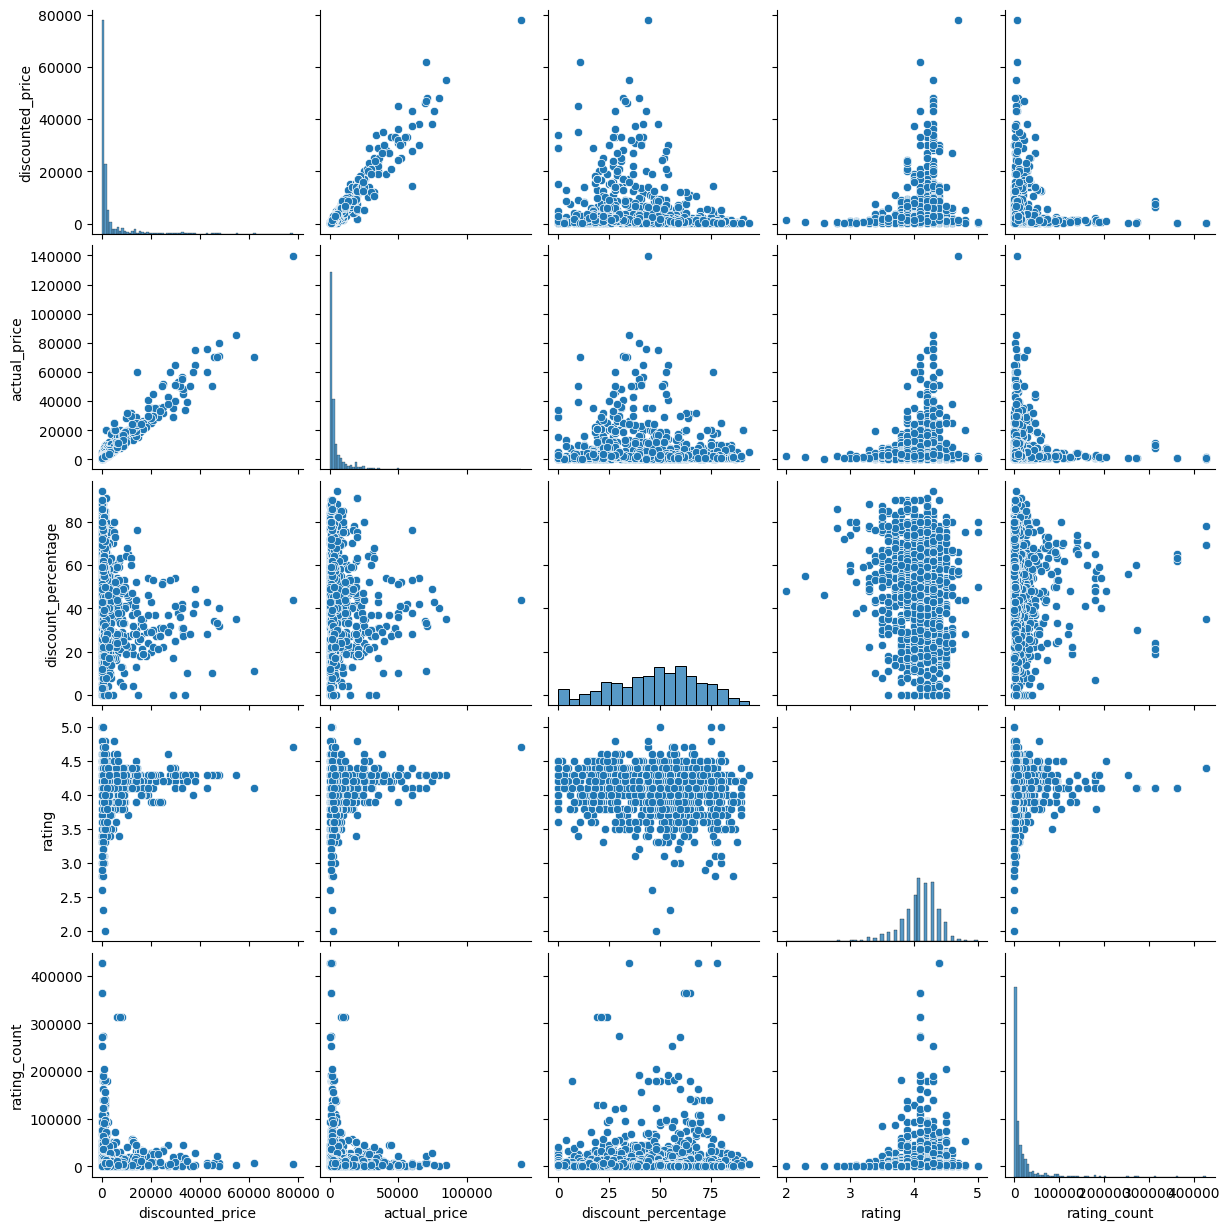

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))

plt.show()

In [ ]:
# define Dtypes

df = df.astype({"discounted_price"      : float,
                "actual_price"          : float,
                "rating"                : float,
                "discount_percentage" : float,
                "rating_count"          : 'Int64',
                })